# ¡Hola Jorge! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class='alert alert-block alert-success'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class='alert alert-block alert-warning'>
<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class='alert alert-block alert-danger'>

<b>Comentario de Reviewer</b> <a class='tocSkip'></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class='alert alert-block alert-info'>
<b>Respuesta estudiante.</b> <a class='tocSkip'></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión v1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Hola Jorge, ¿cómo estás? Espero que todo esté marchando bien de tu lado.

¡Felicitaciones por completar todos los ítems del notebook! Se nota el esfuerzo y dedicación que le has puesto. En líneas generales, el trabajo está bien enfocado y el código cumple con los objetivos planteados. Solo quedan algunos ajustes menores para las imputaciones de los nulo y completar el análisis por región. He dejado comentarios en rojo marcando los puntos a revisar.

Si surge alguna duda, puedes dejarla en un comentario azul y con gusto la responderé en la próxima revisión.

¡Saludos!


</div>

## Resumen de la revisión v2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor  v2 </b> <a class="tocSkip"></a>

¡Buen trabajo Jorge! Las últimas correcciones quedaron muy bien. Completaste todas las tareas del notebook de forma correcta, así que no tengo más observaciones que hacer. El proyecto está aprobado. Todo lo que aplicaste aquí será de gran valor en futuros análisis. ¡Mucho éxito en lo que viene!

Saludos.

</div>

----

Paso 1. Abre el archivo de datos y estudia la información general 

In [484]:
#importar todas las librerias 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np


Paso 2. Prepara los datos

In [485]:
df= pd.read_csv('/datasets/games.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [486]:
#convertir las columas a misculas 
df.columns = df.columns.str.lower()
df.head()
df['year_of_release'].isnull().sum()

269

In [487]:
#convertir year_of_release a entero
df['year_of_release']= pd.to_numeric(df['year_of_release'])
df['year_of_release'].isnull().sum()

269

In [488]:
#Calcule la media de los años de lanzamiento agrupados por pltaforma 
df_plataforma= df.groupby('platform')['year_of_release'].agg('median').astype(int)
df_plataforma

platform
2600    1982
3DO     1995
3DS     2013
DC      2000
DS      2008
GB      1997
GBA     2003
GC      2003
GEN     1993
GG      1992
N64     1999
NES     1986
NG      1994
PC      2010
PCFX    1996
PS      1998
PS2     2005
PS3     2011
PS4     2015
PSP     2009
PSV     2014
SAT     1996
SCD     1994
SNES    1994
TG16    1995
WS      2000
Wii     2009
WiiU    2013
X360    2010
XB      2004
XOne    2015
Name: year_of_release, dtype: int64

In [489]:
# Contar nulos en una columna específica
nulos_por_plataforma = df.groupby('platform')['year_of_release'].agg(lambda x: x.isnull().sum())
print(nulos_por_plataforma)

platform
2600    17.0
3DO      0.0
3DS      8.0
DC       0.0
DS      30.0
GB       1.0
GBA     11.0
GC      14.0
GEN      0.0
GG       0.0
N64      3.0
NES      0.0
NG       0.0
PC      17.0
PCFX     0.0
PS       7.0
PS2     34.0
PS3     25.0
PS4      0.0
PSP     16.0
PSV      1.0
SAT      0.0
SCD      0.0
SNES     0.0
TG16     0.0
WS       0.0
Wii     34.0
WiiU     0.0
X360    30.0
XB      21.0
XOne     0.0
Name: year_of_release, dtype: float64


In [490]:
#Sustitui los nulos por la media de cada plataforma en los nulos de año 
df['year_of_release'] = df['year_of_release'].fillna(
    df.groupby('platform')['year_of_release'].transform('median')
).astype(int)
print('Nulos:',df['year_of_release'].isnull().sum())
print()
df

Nulos: 0



,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Reemplacé los valores nulos de la columna ‘año de lanzamiento’ utilizando la media agrupada por plataforma, logrando así una sustitución más precisa y adecuada.

In [491]:
df.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [493]:
df['critic_score']


0        76.0
1         NaN
2        82.0
3        80.0
4         NaN
         ... 
16710     NaN
16711     NaN
16712     NaN
16713     NaN
16714     NaN
Name: critic_score, Length: 16715, dtype: float64

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Normalmenten no es buena idea usar la media o mediana de toda la data para imputación. Para year_of_release se podría segmentar por consola y luego rellenar los datos según la mediana de los años de lanzamiento de la consola en cuestión. Por ejemplo, la mediana de toda la data podría ser 2005, pero si hay un nulo de PS4, no hace sentido rellenarlo por ese año, ya que la consola ni siquiera existía. En ese caso, la mediana de los años de los juegos de PS4 sería mejor candidato de imputación.

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor   v2       </b> <a class="tocSkip"></a>


Bien hecho, corregido!

</div>

In [494]:
# Verificar si hay plataformas sin valores válidos de critic_score
print("Plataformas con todos los valores NaN en critic_score:")
plataformas_sin_datos = df.groupby('platform')['critic_score'].apply(lambda x: x.isnull().all())
print(plataformas_sin_datos[plataformas_sin_datos == True])

print("\nNúmero de valores NaN por plataforma:")
nulos_por_plataforma = df.groupby('platform')['critic_score'].apply(lambda x: x.isnull().sum())
print(nulos_por_plataforma[nulos_por_plataforma > 0])

Plataformas con todos los valores NaN en critic_score:
platform
2600    True
3DO     True
GB      True
GEN     True
GG      True
N64     True
NES     True
NG      True
PCFX    True
SAT     True
SCD     True
SNES    True
TG16    True
WS      True
Name: critic_score, dtype: bool

Número de valores NaN por plataforma:
platform
2600     133
3DO        3
3DS      352
DC        38
DS      1434
GB        98
GBA      384
GC       108
GEN       29
GG         1
N64      319
NES       98
NG        12
PC       259
PCFX       1
PS       997
PS2      863
PS3      511
PS4      140
PSP      747
PSV      310
SAT      173
SCD        6
SNES     239
TG16       2
WS         6
Wii      735
WiiU      57
X360     346
XB        99
XOne      78
Name: critic_score, dtype: int64


In [495]:
# Primero, verificar qué plataformas tienen datos válidos
print("Plataformas con datos válidos de critic_score:")
datos_validos = df.groupby('platform')['critic_score'].apply(lambda x: x.notna().sum())
print(datos_validos[datos_validos > 0])

# Sustituir nulos por mediana de la plataforma
df['critic_score'] = df['critic_score'].fillna(
    df.groupby('platform')['critic_score'].transform('median')
)

# Para plataformas sin datos válidos, usar la mediana global
mediana_global = df['critic_score'].median()
df['critic_score'] = df['critic_score'].fillna(mediana_global)

# Ahora sí convertir a entero
df['critic_score'] = df['critic_score'].astype(int)
print('Nulos:',df['critic_score'].isnull().sum())

Plataformas con datos válidos de critic_score:
platform
3DS      168
DC        14
DS       717
GBA      438
GC       448
PC       715
PS       200
PS2     1298
PS3      820
PS4      252
PSP      462
PSV      120
Wii      585
WiiU      90
X360     916
XB       725
XOne     169
Name: critic_score, dtype: int64
Nulos: 0


In [496]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70,NaN,NaN


Sustituí los valores nulos o ausentes por la media agrupada por plataforma, de modo que se obtiene un valor más cercano al real.

In [497]:
media_critica = df['critic_score'].mean()
df['critic_score'] = df['critic_score'].fillna(media_critica).round(1).astype(int)

Sutiti los valores ausetes por la media de la columana ya que es un valore que no impacta de manera
significava al analisis 

In [498]:
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

In [499]:
media_user_score = df['user_score'].mean()
print('Media:',media_user_score)
mediana_user_score = df['user_score'].median()
print('Mediana:',mediana_user_score)
      

Media: 7.125046113306982
Mediana: 7.5


La columna de user_score estaba como objet pero en realidad la necesitamos como numero para posibles analisis futuros 
y se conservaron los valores de 'tbd' como ausnetes 

In [500]:
df['user_score'] = df['user_score'].fillna(media_user_score).round(1)

In [501]:
df['user_score'].head(10)

0    8.0
1    7.1
2    8.3
3    8.0
4    7.1
5    7.1
6    8.5
7    6.6
8    8.4
9    7.1
Name: user_score, dtype: float64

In [502]:
# Verificar el tipo de datos de user_score
print("Tipo de datos de user_score:", df['user_score'].dtype)
print("Primeros 10 valores:")
print(df['user_score'].head(10))

# Para información más detallada de la Serie, usa describe()
print("Información estadística de la columna:")
print(df['user_score'].describe())

# O para información general del DataFrame completo:
print("Información del DataFrame completo:")
df.info()

Tipo de datos de user_score: float64
Primeros 10 valores:
0    8.0
1    7.1
2    8.3
3    8.0
4    7.1
5    7.1
6    8.5
7    6.6
8    8.4
9    7.1
Name: user_score, dtype: float64
Información estadística de la columna:
count    16715.000000
mean         7.111373
std          1.010830
min          0.000000
25%          7.100000
50%          7.100000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64
Información del DataFrame completo:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_s

In [503]:
# Convertir explícitamente a numérico
df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')
df['user_score'].dtypes

dtype('float64')

In [504]:
# Calcular la media de user_score por género
media_por_genero = df.groupby('genre')['user_score'].mean()
print("Media de user_score por género:")
print(media_por_genero)

Media de user_score por género:
genre
Action          7.075037
Adventure       7.107598
Fighting        7.195171
Misc            7.029600
Platform        7.197072
Puzzle          7.116552
Racing          7.067254
Role-Playing    7.357677
Shooter         7.059410
Simulation      7.113631
Sports          7.034796
Strategy        7.188873
Name: user_score, dtype: float64


In [505]:
# Verificar si hay géneros sin datos válidos
print("Géneros con datos válidos:")
datos_validos_genero = df.groupby('genre')['user_score'].apply(lambda x: x.notna().sum())
print(datos_validos_genero)

# Imputación completa con respaldo
df['user_score'] = df['user_score'].fillna(df.groupby('genre')['user_score'].transform('mean'))

# Para géneros sin datos válidos, usar la media global
media_global = df['user_score'].mean()
df['user_score'] = df['user_score'].fillna(media_global)

Géneros con datos válidos:
genre
Action          3369
Adventure       1303
Fighting         849
Misc            1750
Platform         888
Puzzle           580
Racing          1249
Role-Playing    1498
Shooter         1323
Simulation       873
Sports          2348
Strategy         683
Name: user_score, dtype: int64


In [506]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Para la columna user_score decidí agrupar por género, calcular la media y sustituir los valores ausentes, con el fin de disminuir el sesgo.

In [507]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70,7.1,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70,7.1,NaN


<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Por lo general, no es buena idea rellenar todos los ausentes por la media o mediana de toda la data. Lo ideal es realizar una segmentación de los datos nulos y rellenar los nulos según al segmento que pertenece. En el caso de `user_score` y `critic_score`, si revisas la distribución antes y después de imputar, verás que se introdujo un sesgo muy fuerte en la data, la distribución queda marcadamente sobrerepresentada en el valor de la media. 

No tenemos suficiente información para imputar las variables de score, sin embargo, su porcentaje es muy grande y perderíamos la información adyacente si decidieramos eliminar esas filas. Lo mejor es no eliminar los datos ausentes y conservar las columnas tal y como están.   

</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor    v2      </b> <a class="tocSkip"></a>

Bien, la imputación utilizada está un poco mejor. De todos modos, no me parece muy intuitivo que la mediana por género sea lo más adecuado para segmentar el score.



</div>

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  int64  
 9   user_score       16715 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


In [509]:
df['rating'].isnull().sum()

6766

In [510]:
df.query('rating.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70,7.1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70,7.1,NaN
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70,7.1,NaN
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70,7.1,NaN
10,Nintendogs,DS,2005,Simulation,9.05,10.95,1.93,2.74,66,7.1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73,7.1,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71,7.1,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71,7.1,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69,7.1,NaN


In [511]:
print("Valores únicos en rating:")
print(df['rating'].value_counts())
print()
print("Porcentaje de valores ausentes:")
print(f"{df['rating'].isnull().sum() / len(df) * 100:.1f}%")

Valores únicos en rating:
E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

Porcentaje de valores ausentes:
40.5%


In [512]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [513]:
df['rating'] = df['rating'].fillna('Unknown')

In [514]:
df['rating'].head(10)

0          E
1    Unknown
2          E
3          E
4    Unknown
5    Unknown
6          E
7          E
8          E
9    Unknown
Name: rating, dtype: object

In [515]:
columnas_ventas = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']
df['ventas_totales'] = df[columnas_ventas].sum(axis=1)

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien, la suma de la venta en todas las regiones está correcta

</div>

In [516]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70,7.1,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70,7.1,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73,7.1,Unknown,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,71,7.1,Unknown,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,71,7.1,Unknown,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,69,7.1,Unknown,0.01


Se han sustituido todos los valores ausentes en cada columna por el valor óptimo, de acuerdo con la utilidad para cada uso, de manera que no se vea afectado ni tenga un impacto elevado en el análisis estadístico o en la toma de decisiones.

Paso 3. Analiza los datos

In [517]:
ventas_por_año= df.groupby('year_of_release').agg(ventas_por_año=('ventas_totales','sum')).reset_index()

In [518]:
ventas_por_año.head(10)

,year_of_release,ventas_por_año
0,1980,11.38
1,1981,35.68
2,1982,39.38
3,1983,16.80
4,1984,50.35
5,1985,53.95
6,1986,37.08
7,1987,21.70
8,1988,47.21
9,1989,73.45


In [519]:
juegos_por_año = df.groupby('year_of_release').agg(juegos_por_año=('name','count')).reset_index()

In [520]:
juegos_por_año.head(10)

,year_of_release,juegos_por_año
0,1980,9
1,1981,46
2,1982,53
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [521]:
analisis_por_año = juegos_por_año.merge(ventas_por_año, on='year_of_release')

In [522]:
analisis_por_año

,year_of_release,juegos_por_año,ventas_por_año
0,1980,9,11.38
1,1981,46,35.68
2,1982,53,39.38
3,1983,17,16.80
4,1984,14,50.35
5,1985,14,53.95
6,1986,21,37.08
7,1987,16,21.70
8,1988,15,47.21
9,1989,17,73.45


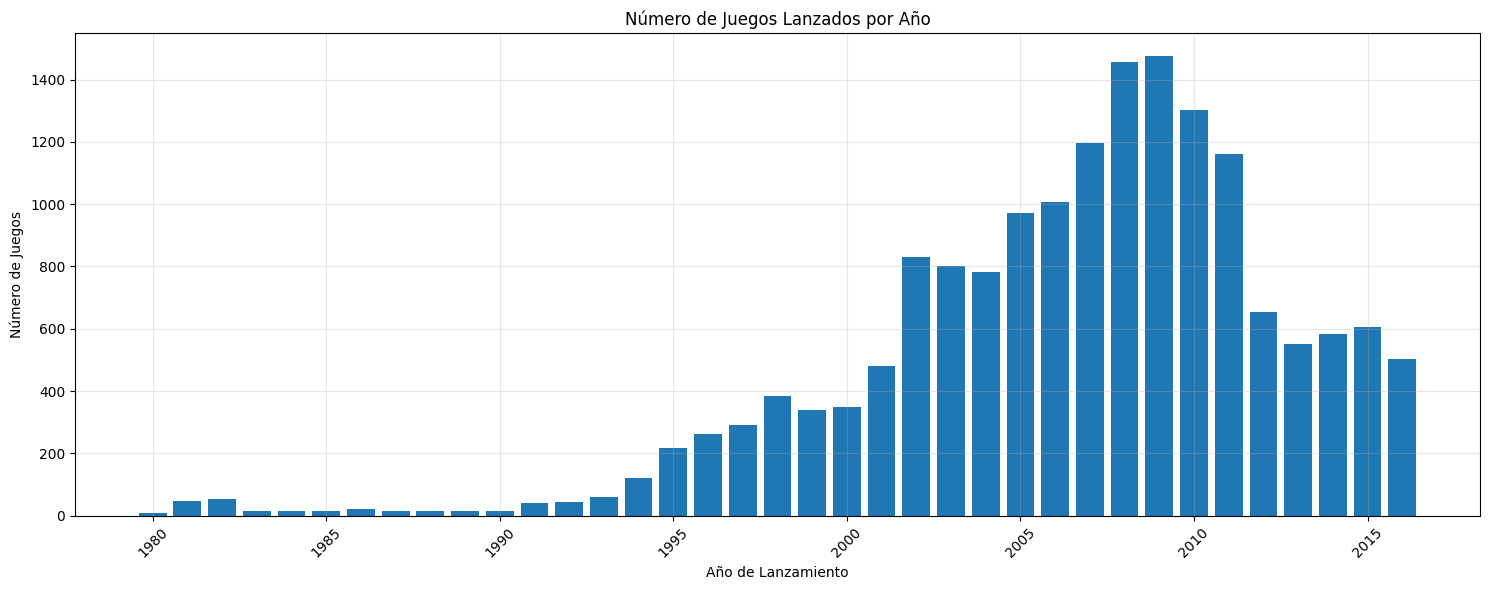

In [523]:
# Gráfica de barras para número de juegos por año
plt.figure(figsize=(15, 6))
plt.bar(analisis_por_año['year_of_release'], analisis_por_año['juegos_por_año'])
plt.title('Número de Juegos Lanzados por Año')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor              </b><a class="tocSkip"></a>


Muy bien, aunque idealmente hubieses mostrado un gráfico con los datos calculados en esta tabla.


</div>

In [524]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [525]:
ventas_por_plataforma = df.groupby('platform').agg(ventas_totales_plataforma=('ventas_totales','sum')).reset_index()

In [526]:
ventas_por_plataforma

,platform,ventas_totales_plataforma
0,2600,96.98
1,3DO,0.10
2,3DS,259.00
3,DC,15.95
4,DS,806.12
5,GB,255.46
6,GBA,317.85
7,GC,198.93
8,GEN,30.77
9,GG,0.04


In [527]:
top_plataformas = ventas_por_plataforma.sort_values('ventas_totales_plataforma', ascending=False)
print("Top 10 plataformas por ventas totales:")
top_plataformas.head(10)

Top 10 plataformas por ventas totales:


,platform,ventas_totales_plataforma
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86
6,GBA,317.85
18,PS4,314.14
19,PSP,294.05
13,PC,259.52


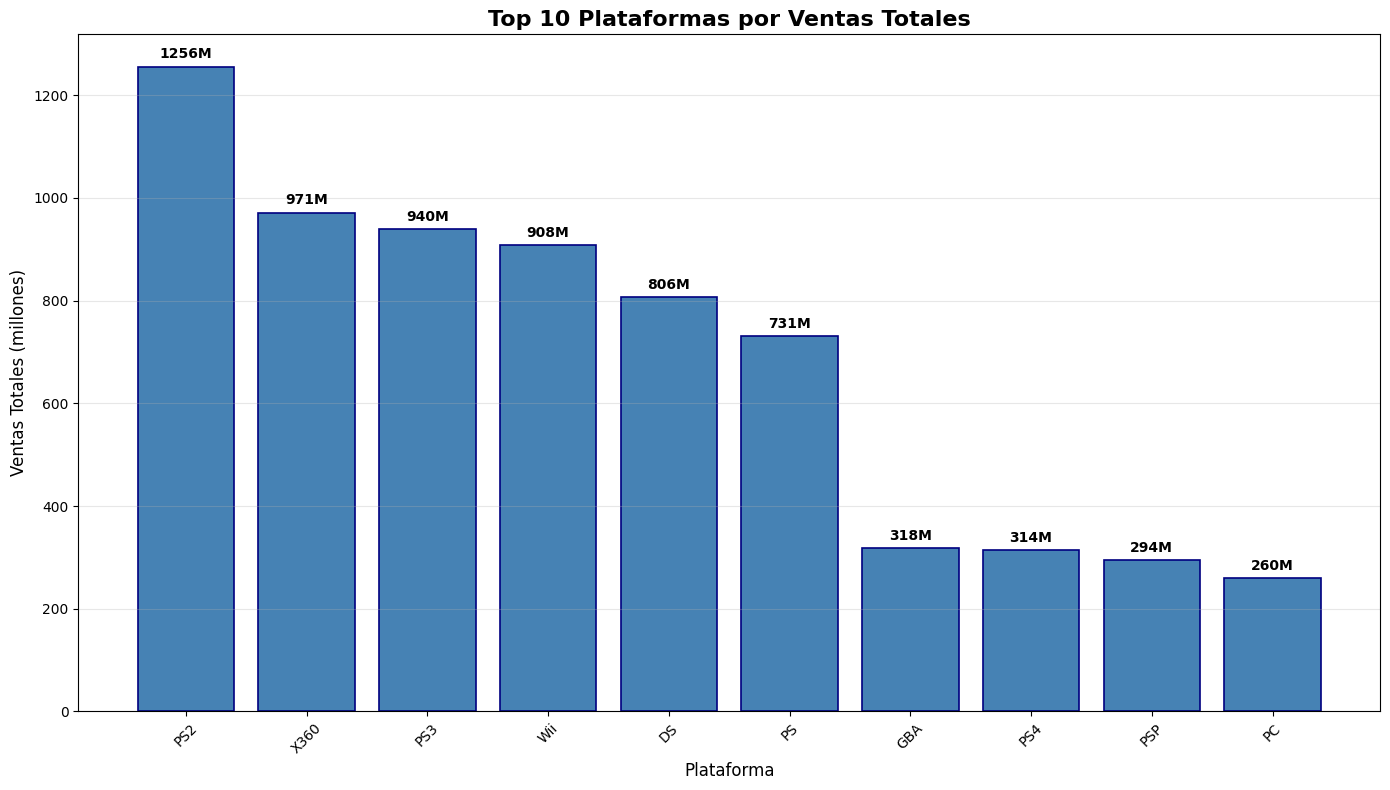

In [528]:
# Tomar solo las top 10 plataformas para mejor visualización
top_10_plataformas = top_plataformas.head(10)

plt.figure(figsize=(14, 8))
bars = plt.bar(top_10_plataformas['platform'], 
               top_10_plataformas['ventas_totales_plataforma'],
               color='steelblue', 
               edgecolor='navy', 
               linewidth=1.2)

# Añadir valores en las barras
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{height:.0f}M',
             ha='center', va='bottom', fontweight='bold')

plt.title('Top 10 Plataformas por Ventas Totales', fontsize=16, fontweight='bold')
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Totales (millones)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien con la data, pero un gráfico permitiría ver mejor el volumen de ventas de cada plataforma y compararlas rápidamente.

</div>

In [529]:
top_5_plataformas = top_plataformas.head(5)['platform'].tolist()
top_5_plataformas

['PS2', 'X360', 'PS3', 'Wii', 'DS']

In [530]:
df_top_plataformas = df[df['platform'].isin(top_5_plataformas)]
df_top_plataformas

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16700,Mezase!! Tsuri Master DS,DS,2009,Sports,0.00,0.00,0.01,0.00,66,7.1,Unknown,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.00,0.00,66,7.1,E,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,70,7.1,Unknown,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,73,7.1,Unknown,0.01


In [531]:
distribucion_anual = df_top_plataformas.groupby(['year_of_release', 'platform']).agg(
    ventas_anuales=('ventas_totales', 'sum')
).reset_index()
distribucion_anual

,year_of_release,platform,ventas_anuales
0,1985,DS,0.02
1,2000,PS2,39.17
2,2001,PS2,166.43
3,2002,PS2,205.38
4,2003,PS2,184.31
5,2004,DS,17.27
6,2004,PS2,211.81
7,2005,DS,130.14
8,2005,PS2,182.87
9,2005,X360,8.25


In [532]:
# Definir períodos
epoca_dorada = df[df['year_of_release'] <= 2010]  
epoca_reciente = df[df['year_of_release'] >= 2012]  

In [533]:
epoca_dorada.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70,7.1,Unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,70,7.1,Unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,70,7.1,Unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,70,7.1,Unknown,28.31


In [534]:
epoca_reciente.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,ventas_totales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73,7.1,Unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,68,7.1,Unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
35,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,68,7.1,Unknown,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73,2.6,M,10.24
62,New Super Mario Bros. 2,3DS,2012,Platform,3.66,3.14,2.47,0.63,78,7.2,E,9.90


In [535]:
# Ventas en época dorada por plataforma
ventas_dorada = epoca_dorada.groupby('platform').agg(ventas_dorada=('ventas_totales', 'sum'),juegos_dorada=('name', 'count')
).reset_index()

In [536]:
ventas_dorada

,platform,ventas_dorada,juegos_dorada
0,2600,96.98,133
1,3DO,0.10,3
2,DC,15.95,52
3,DS,767.39,1967
4,GB,255.46,98
5,GBA,317.85,822
6,GC,198.93,556
7,GEN,30.77,27
8,GG,0.04,1
9,N64,218.68,319


In [537]:
# Ventas en época reciente por plataforma
ventas_reciente = epoca_reciente.groupby('platform').agg(ventas_reciente=('ventas_totales', 'sum'),juegos_reciente=('name', 'count') ).reset_index()

In [538]:
ventas_reciente

,platform,ventas_reciente,juegos_reciente
0,3DS,195.80,404
1,DS,12.55,31
2,PC,62.65,250
3,PS3,288.79,493
4,PS4,314.14,392
5,PSP,11.19,173
6,PSV,49.44,412
7,Wii,35.37,54
8,WiiU,82.19,147
9,X360,236.54,292


In [539]:
# Combinar ambos períodos
comparacion = ventas_dorada.merge(ventas_reciente, on='platform', how='outer').fillna(0)

# Calcular la diferencia
comparacion['diferencia_ventas'] = comparacion['ventas_dorada'] - comparacion['ventas_reciente']

In [540]:
comparacion

,platform,ventas_dorada,juegos_dorada,ventas_reciente,juegos_reciente,diferencia_ventas
0,2600,96.98,133.0,0.00,0.0,96.98
1,3DO,0.10,3.0,0.00,0.0,0.10
2,DC,15.95,52.0,0.00,0.0,15.95
3,DS,767.39,1967.0,12.55,31.0,754.84
4,GB,255.46,98.0,0.00,0.0,255.46
5,GBA,317.85,822.0,0.00,0.0,317.85
6,GC,198.93,556.0,0.00,0.0,198.93
7,GEN,30.77,27.0,0.00,0.0,30.77
8,GG,0.04,1.0,0.00,0.0,0.04
9,N64,218.68,319.0,0.00,0.0,218.68


In [541]:
#Calcular el primer y ultmo año por plataforma 
ciclo_vida_plataformas = df.groupby('platform').agg(
    primer_año=('year_of_release', 'min'),
    ultimo_año=('year_of_release', 'max'),
    total_juegos=('name', 'count'),
    ventas_totales=('ventas_totales', 'sum')
).reset_index()


In [542]:
ciclo_vida_plataformas

,platform,primer_año,ultimo_año,total_juegos,ventas_totales
0,2600,1980,1989,133,96.98
1,3DO,1994,1995,3,0.10
2,3DS,2011,2016,520,259.00
3,DC,1998,2008,52,15.95
4,DS,1985,2013,2151,806.12
5,GB,1988,2001,98,255.46
6,GBA,2000,2007,822,317.85
7,GC,2001,2007,556,198.93
8,GEN,1990,1994,27,30.77
9,GG,1992,1992,1,0.04


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho! Muy bien con la aplicación de agrupaciones para encontrar los primeros y últimos años de cada consola. Así, tenemos una medida precisa de sus años de vida de uso.

</div>

In [543]:
# Calcular la duración del ciclo de vida
ciclo_vida_plataformas['duracion_años'] = ciclo_vida_plataformas['ultimo_año'] - ciclo_vida_plataformas['primer_año']

In [544]:
ciclo_vida_plataformas

,platform,primer_año,ultimo_año,total_juegos,ventas_totales,duracion_años
0,2600,1980,1989,133,96.98,9
1,3DO,1994,1995,3,0.10,1
2,3DS,2011,2016,520,259.00,5
3,DC,1998,2008,52,15.95,10
4,DS,1985,2013,2151,806.12,28
5,GB,1988,2001,98,255.46,13
6,GBA,2000,2007,822,317.85,7
7,GC,2001,2007,556,198.93,6
8,GEN,1990,1994,27,30.77,4
9,GG,1992,1992,1,0.04,0


In [545]:
#Ordenar por duración del ciclo de vida
ciclo_ordenado = ciclo_vida_plataformas.sort_values('duracion_años', ascending=False)

In [546]:
ciclo_ordenado

,platform,primer_año,ultimo_año,total_juegos,ventas_totales,duracion_años
13,PC,1985,2016,974,259.52,31
4,DS,1985,2013,2151,806.12,28
5,GB,1988,2001,98,255.46,13
28,X360,2005,2016,1262,971.42,11
19,PSP,2004,2015,1209,294.05,11
16,PS2,2000,2011,2161,1255.77,11
11,NES,1983,1994,98,251.05,11
3,DC,1998,2008,52,15.95,10
26,Wii,2006,2016,1320,907.51,10
17,PS3,2006,2016,1331,939.65,10


In [547]:
# Plataformas que terminaron antes de 2015 (considerando que los datos llegan hasta 2016)
plataformas_descontinuadas = ciclo_vida_plataformas[ciclo_vida_plataformas['ultimo_año'] < 2015]

In [548]:
plataformas_descontinuadas

,platform,primer_año,ultimo_año,total_juegos,ventas_totales,duracion_años
0,2600,1980,1989,133,96.98,9
1,3DO,1994,1995,3,0.10,1
3,DC,1998,2008,52,15.95,10
4,DS,1985,2013,2151,806.12,28
5,GB,1988,2001,98,255.46,13
6,GBA,2000,2007,822,317.85,7
7,GC,2001,2007,556,198.93,6
8,GEN,1990,1994,27,30.77,4
9,GG,1992,1992,1,0.04,0
10,N64,1996,2002,319,218.68,6


In [549]:
ciclo_ordenado_por_ventas = ciclo_vida_plataformas.sort_values('ventas_totales', ascending=False)

In [550]:
#Top de las plataformas con mas ventas y que se pueden conciderar las mar rentables por ventas 
ciclo_ordenado_por_ventas.head(10)

,platform,primer_año,ultimo_año,total_juegos,ventas_totales,duracion_años
16,PS2,2000,2011,2161,1255.77,11
28,X360,2005,2016,1262,971.42,11
17,PS3,2006,2016,1331,939.65,10
26,Wii,2006,2016,1320,907.51,10
4,DS,1985,2013,2151,806.12,28
15,PS,1994,2003,1197,730.86,9
6,GBA,2000,2007,822,317.85,7
18,PS4,2013,2016,392,314.14,3
19,PSP,2004,2015,1209,294.05,11
13,PC,1985,2016,974,259.52,31


In [551]:
ciclo_ordenado_por_ventas_negativas = ciclo_vida_plataformas.sort_values('ventas_totales', ascending=True)

In [552]:
#Top de platarmas que no geran ventas y decrecieron 
ciclo_ordenado_por_ventas_negativas.head(10)

,platform,primer_año,ultimo_año,total_juegos,ventas_totales,duracion_años
14,PCFX,1996,1996,1,0.03,0
9,GG,1992,1992,1,0.04,0
1,3DO,1994,1995,3,0.10,1
24,TG16,1995,1995,2,0.16,0
25,WS,1999,2001,6,1.42,2
12,NG,1993,1996,12,1.44,3
22,SCD,1993,1994,6,1.86,1
3,DC,1998,2008,52,15.95,10
8,GEN,1990,1994,27,30.77,4
21,SAT,1994,1999,173,33.59,5


In [553]:
# Obtener las top 10 plataformas por ventas totales
top_10_plataformas = top_plataformas.head(10)['platform'].tolist()
print("Top 10 plataformas:" , top_10_plataformas)

Top 10 plataformas: ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']


In [554]:
# Filtrar el DataFrame para incluir solo las top 10 plataformas
df_top_10 = df[df['platform'].isin(top_10_plataformas)]
print(f"Número de juegos en top 10 plataformas: {len(df_top_10)}")

Número de juegos en top 10 plataformas: 12819


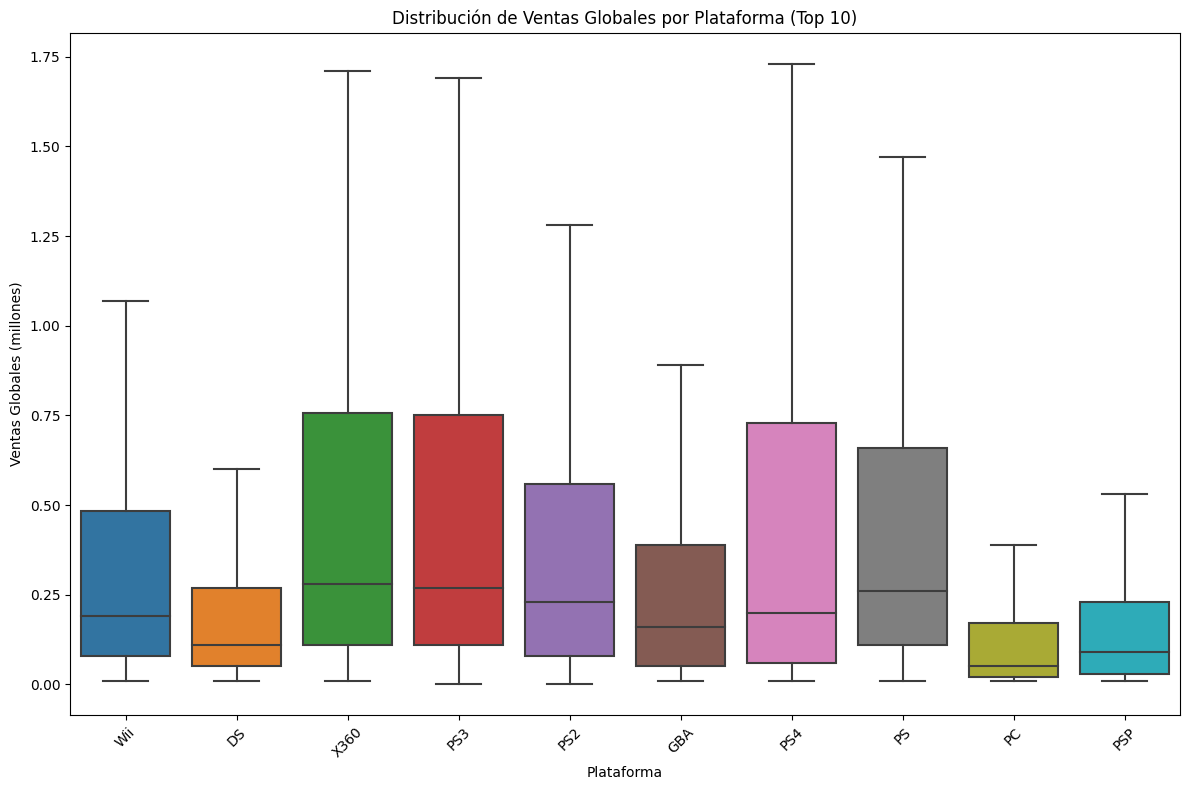

In [555]:
# Crear el diagrama de caja
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_top_10, x='platform', y='ventas_totales',showfliers=False)
plt.title('Distribución de Ventas Globales por Plataforma (Top 10)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Globales (millones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-warning">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien con el gráfico de boxplots, sin embargo, nota que a causa de los outliers no podemos ver la variabilidad de cada consola (las cajas son muy pequeñitas). En este caso se puede realizar el mismo gráfico pero reemplazando la escala normal por una escala logarítmica o agregando un gráfico adicional con la escala normal pero limitada a valores más pequeños (una especie de zoom al gráfico original).

</div>

¿Son significativas las diferencias en las ventas? Si esas diferencias son estadísticamente significativas y las ventas globales de las tres plataformas también lo son, esto nos confirma, de manera gráfica, que dichas plataformas se encuentran en el top de ventas.

In [556]:
# Calcular ventas promedio por juego en cada plataforma
ventas_promedio_plataforma = df.groupby('platform').agg(
    ventas_totales=('ventas_totales', 'sum'),
    total_juegos=('name', 'count'),
    ventas_promedio_por_juego=('ventas_totales', 'mean')
).reset_index()


In [557]:
# Ordenar por ventas promedio (de mayor a menor)
ventas_promedio_ordenado = ventas_promedio_plataforma.sort_values('ventas_promedio_por_juego', ascending=False)

In [558]:
ventas_promedio_ordenado

,platform,ventas_totales,total_juegos,ventas_promedio_por_juego
5,GB,255.46,98,2.606735
11,NES,251.05,98,2.561735
8,GEN,30.77,27,1.061034
23,SNES,200.04,239,0.836987
18,PS4,314.14,392,0.801378
28,X360,971.42,1262,0.769746
0,2600,96.98,133,0.729173
17,PS3,939.65,1331,0.705973
26,Wii,907.51,1320,0.687508
10,N64,218.68,319,0.685517


Existen variaciones entre las ventas promedio y las ventas top de los juegos, ya que las plataformas que se encuentran en el top de ventas no necesariamente son las mismas que destacan en las ventas promedio. Esto se debe al número de juegos que produce cada plataforma en comparación con aquellas que lograron mayores ventas totales.

In [559]:
# Filtrar solo los juegos de PS2
ps2_games = df[df['platform'] == 'PS2'].copy()
print(f"Número de juegos de PS2: {len(ps2_games)}")
print(f"Rango de critic_score: {ps2_games['critic_score'].min()} - {ps2_games['critic_score'].max()}")
print(f"Rango de user_score: {ps2_games['user_score'].min()} - {ps2_games['user_score'].max()}")

Número de juegos de PS2: 2161
Rango de critic_score: 24 - 97
Rango de user_score: 1.7 - 9.5


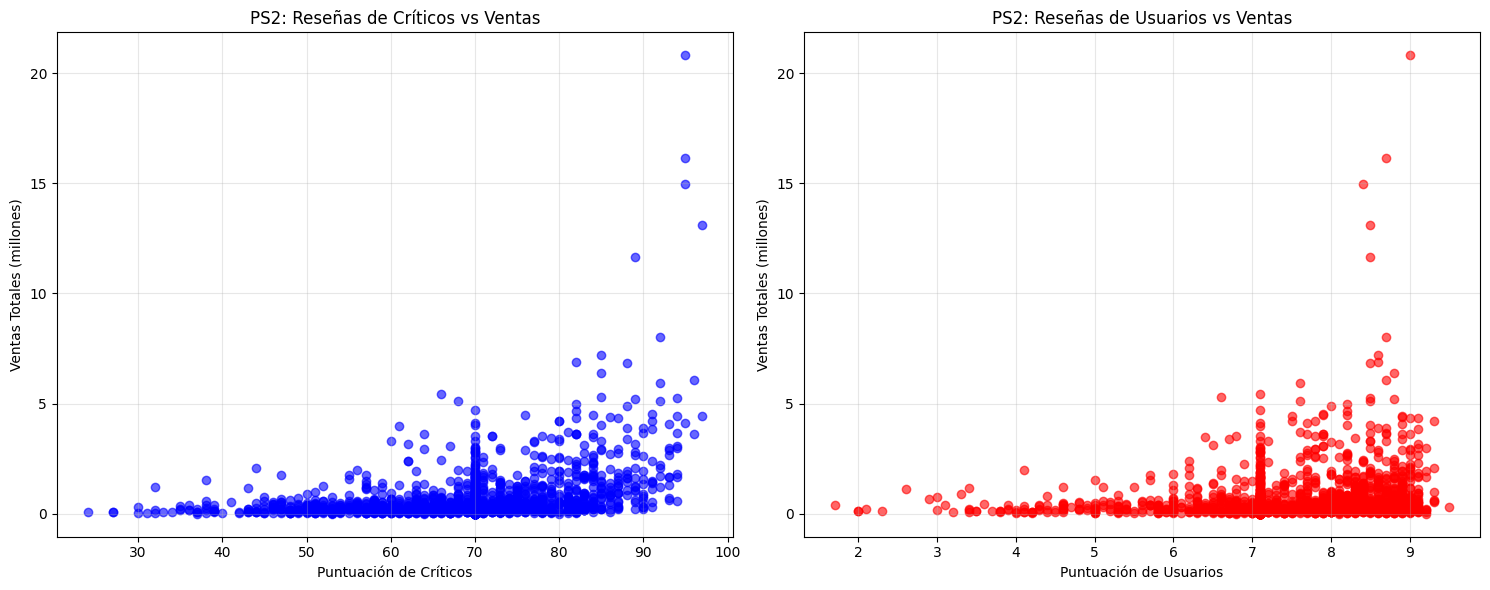

In [560]:
# Crear subplots para ambas correlaciones
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gráfico 1: Critic Score vs Ventas
ax1.scatter(ps2_games['critic_score'], ps2_games['ventas_totales'], alpha=0.6, color='blue')
ax1.set_xlabel('Puntuación de Críticos')
ax1.set_ylabel('Ventas Totales (millones)')
ax1.set_title('PS2: Reseñas de Críticos vs Ventas')
ax1.grid(True, alpha=0.3)

# Gráfico 2: User Score vs Ventas
ax2.scatter(ps2_games['user_score'], ps2_games['ventas_totales'], alpha=0.6, color='red')
ax2.set_xlabel('Puntuación de Usuarios')
ax2.set_ylabel('Ventas Totales (millones)')
ax2.set_title('PS2: Reseñas de Usuarios vs Ventas')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con el gráfico y el cálculo del coeficiente. Permite obtener una visión general de la correlación entre ambas variables.

</div>

La puntuacion de los criticos y la de los usuarios se comportan de manera muy similar para cada plataforma y juego 

In [561]:
# Encontrar juegos que aparecen en múltiples plataformas
juegos_multiplataforma = df.groupby('name').agg(
    num_plataformas=('platform', 'nunique'),
    plataformas=('platform', lambda x: list(x.unique())),
    ventas_totales_todas=('ventas_totales', 'sum')
).reset_index()

# Filtrar solo juegos que están en al menos 2 plataformas
juegos_multi = juegos_multiplataforma[juegos_multiplataforma['num_plataformas'] >= 2]
print(f"Juegos en múltiples plataformas: {len(juegos_multi)}")
print("Top 10 juegos con más plataformas:")
juegos_multi.sort_values('num_plataformas', ascending=False).head(10)

Juegos en múltiples plataformas: 2805
Top 10 juegos con más plataformas:


,name,num_plataformas,plataformas,ventas_totales_todas
6715,Need for Speed: Most Wanted,10,"[PS2, PS3, X360, XB, PSV, GC, PC, WiiU, DS, GBA]",13.77
5470,Madden NFL 07,9,"[PS2, X360, XB, PSP, GC, PS3, Wii, DS, GBA]",10.06
7785,Ratatouille,9,"[DS, PS2, PSP, PS3, Wii, X360, GBA, GC, PC]",4.37
5143,LEGO Marvel Super Heroes,9,"[X360, PS3, PS4, XOne, 3DS, WiiU, PSV, DS, PC]",9.41
2952,FIFA 14,9,"[PS3, X360, PS4, XOne, PSV, PC, Wii, 3DS, PSP]",16.46
5211,Lego Batman 3: Beyond Gotham,8,"[PS4, X360, PS3, 3DS, WiiU, XOne, PSV, PC]",4.26
5156,LEGO The Hobbit,8,"[PS4, PS3, X360, XOne, 3DS, WiiU, PSV, PC]",2.43
1306,Cars,8,"[PS2, PSP, GBA, DS, GC, Wii, X360, XB]",6.82
2953,FIFA 15,8,"[PS4, PS3, X360, XOne, PSV, Wii, 3DS, PC]",17.37
5152,LEGO Star Wars II: The Original Trilogy,8,"[PS2, PSP, DS, GC, X360, XB, GBA, PC]",7.30


<div class="alert alert-block alert-warning">
<b>Comentario de Revisor          </b> <a class="tocSkip"></a>

Bien con estas comparaciones, pero lo ideal hubiese sido comparar juego a juego, no totales de juegos.



</div>

Distribución de juegos por género:
Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64



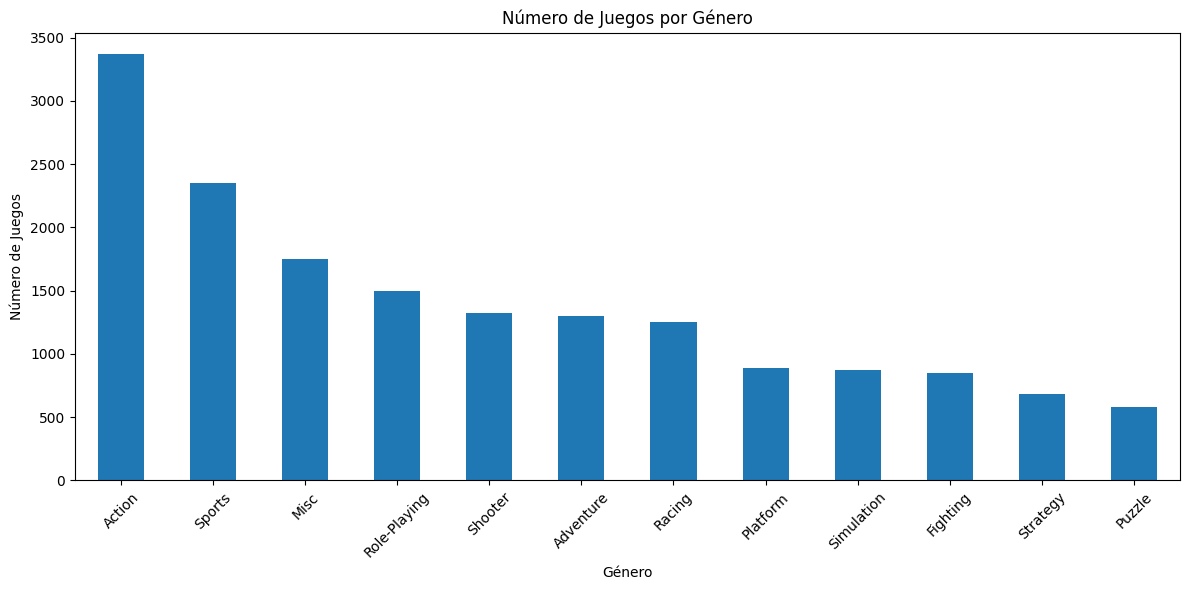

In [562]:
# Distribución de juegos por género
generos_distribucion = df['genre'].value_counts()
print("Distribución de juegos por género:")
print(generos_distribucion)
print()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
generos_distribucion.plot(kind='bar')
plt.title('Número de Juegos por Género')
plt.xlabel('Género')
plt.ylabel('Número de Juegos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [563]:
# Ventas totales por género
ventas_por_genero = df.groupby('genre').agg(
    ventas_totales=('ventas_totales', 'sum'),
    num_juegos=('name', 'count'),
    ventas_promedio=('ventas_totales', 'mean')
).reset_index()

# Ordenar por ventas totales
ventas_por_genero_ordenado = ventas_por_genero.sort_values('ventas_totales', ascending=False)
print("Ventas totales por género:")
print(ventas_por_genero_ordenado)

Ventas totales por género:
           genre  ventas_totales  num_juegos  ventas_promedio
0         Action         1744.17        3369         0.517711
10        Sports         1331.27        2348         0.566980
8        Shooter         1052.45        1323         0.795503
7   Role-Playing          934.56        1498         0.623872
4       Platform          827.77         888         0.932173
3           Misc          802.51        1750         0.458577
6         Racing          728.67        1249         0.583403
2       Fighting          447.53         849         0.527126
9     Simulation          389.97         873         0.446701
5         Puzzle          242.57         580         0.418224
1      Adventure          237.59        1303         0.182341
11      Strategy          174.23         683         0.255095


<div class="alert alert-block alert-success">
<b>Comentario de Revisor      </b> <a class="tocSkip"></a>

Muy bien con el análisis, es importante revisar tanto las ventas totales como la venta promedio. 



</div>

Es evidente que los juegos de acción son los más rentables en cuanto a ventas totales; sin embargo, eso no significa que tengan el mejor promedio. Al analizar el top de ventas, es importante considerar el número de juegos desarrollados y el costo de cada uno.

Paso 4. Crea un perfil de usuario para cada región

In [564]:
# Análisis de plataformas por región
print("=== ANÁLISIS DE PLATAFORMAS POR REGIÓN ===\n")

# Top 5 plataformas en Norteamérica
na_plataformas = df.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 plataformas en Norteamérica (NA):")
print(na_plataformas)
print()

# Top 5 plataformas en Europa
eu_plataformas = df.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 plataformas en Europa (EU):")
print(eu_plataformas)
print()

# Top 5 plataformas en Japón
jp_plataformas = df.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)
print("Top 5 plataformas en Japón (JP):")
print(jp_plataformas)

=== ANÁLISIS DE PLATAFORMAS POR REGIÓN ===

Top 5 plataformas en Norteamérica (NA):
platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

Top 5 plataformas en Europa (EU):
platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

Top 5 plataformas en Japón (JP):
platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64


In [565]:
# Calcular cuotas de mercado
ventas_totales_na = df['na_sales'].sum()
ventas_totales_eu = df['eu_sales'].sum()
ventas_totales_jp = df['jp_sales'].sum()

print(f"Ventas totales NA: {ventas_totales_na:.2f} millones")
print(f"Ventas totales EU: {ventas_totales_eu:.2f} millones")
print(f"Ventas totales JP: {ventas_totales_jp:.2f} millones")
print()

# Crear DataFrame comparativo de las top 5 plataformas
top_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

comparacion_regional = df[df['platform'].isin(top_platforms)].groupby('platform').agg(
    NA_ventas=('na_sales', 'sum'),
    EU_ventas=('eu_sales', 'sum'),
    JP_ventas=('jp_sales', 'sum')
).reset_index()

# Calcular porcentajes
comparacion_regional['NA_porcentaje'] = (comparacion_regional['NA_ventas'] / ventas_totales_na * 100).round(2)
comparacion_regional['EU_porcentaje'] = (comparacion_regional['EU_ventas'] / ventas_totales_eu * 100).round(2)
comparacion_regional['JP_porcentaje'] = (comparacion_regional['JP_ventas'] / ventas_totales_jp * 100).round(2)

print("Cuotas de mercado de las top 5 plataformas por región:")
print(comparacion_regional)

Ventas totales NA: 4402.35 millones
Ventas totales EU: 2424.67 millones
Ventas totales JP: 1297.37 millones

Cuotas de mercado de las top 5 plataformas por región:
  platform  NA_ventas  EU_ventas  JP_ventas  NA_porcentaje  EU_porcentaje  \
0       DS     382.40     188.89     175.57           8.69           7.79   
1      PS2     583.84     339.29     139.20          13.26          13.99   
2      PS3     393.49     330.29      80.19           8.94          13.62   
3      Wii     496.90     262.21      69.33          11.29          10.81   
4     X360     602.47     270.76      12.43          13.69          11.17   

   JP_porcentaje  
0          13.53  
1          10.73  
2           6.18  
3           5.34  
4           0.96  


In [571]:
# Calcular las 5 plataformas principales por ventas totales globales
top_5_plataformas_global = df.groupby('platform').agg(
    ventas_totales=('ventas_totales', 'sum')
).sort_values('ventas_totales', ascending=False).head(5)

print("Las 5 plataformas principales globalmente:")
print(top_5_plataformas_global)

Las 5 plataformas principales globalmente:
          ventas_totales
platform                
PS2              1255.77
X360              971.42
PS3               939.65
Wii               907.51
DS                806.12


In [572]:
top_5_platforms = ['PS2', 'X360', 'PS3', 'Wii', 'DS']

# Calcular ventas totales por región
ventas_totales_na = df['na_sales'].sum()
ventas_totales_eu = df['eu_sales'].sum() 
ventas_totales_jp = df['jp_sales'].sum()

# Crear análisis detallado de cuotas de mercado
cuotas_mercado = df[df['platform'].isin(top_5_platforms)].groupby('platform').agg(NA_ventas=('na_sales', 'sum'),
                 EU_ventas = ('eu_sales', 'sum'),JP_ventas=('jp_sales', 'sum')).reset_index()

# Calcular porcentajes de cuota de mercado
cuotas_mercado['NA_cuota'] = (cuotas_mercado['NA_ventas'] / ventas_totales_na * 100).round(2)
cuotas_mercado['EU_cuota'] = (cuotas_mercado['EU_ventas'] / ventas_totales_eu * 100).round(2)
cuotas_mercado['JP_cuota'] = (cuotas_mercado['JP_ventas'] / ventas_totales_jp * 100).round(2)

print("Cuotas de mercado de las 5 plataformas principales:")
print(cuotas_mercado)

Cuotas de mercado de las 5 plataformas principales:
  platform  NA_ventas  EU_ventas  JP_ventas  NA_cuota  EU_cuota  JP_cuota
0       DS     382.40     188.89     175.57      8.69      7.79     13.53
1      PS2     583.84     339.29     139.20     13.26     13.99     10.73
2      PS3     393.49     330.29      80.19      8.94     13.62      6.18
3      Wii     496.90     262.21      69.33     11.29     10.81      5.34
4     X360     602.47     270.76      12.43     13.69     11.17      0.96


In [573]:
# Crear tabla comparativa de variaciones
print("\n=== ANÁLISIS DE VARIACIONES POR REGIÓN ===\n")

for platform in top_5_platforms:
    data = cuotas_mercado[cuotas_mercado['platform'] == platform].iloc[0]
    
    print(f"**{platform}:**")
    print(f"  • NA: {data['NA_cuota']}% ({data['NA_ventas']:.1f}M)")
    print(f"  • EU: {data['EU_cuota']}% ({data['EU_ventas']:.1f}M)")
    print(f"  • JP: {data['JP_cuota']}% ({data['JP_ventas']:.1f}M)")
    
    # Calcular variación máxima
    cuotas = [data['NA_cuota'], data['EU_cuota'], data['JP_cuota']]
    variacion = max(cuotas) - min(cuotas)
    print(f"  • Variación máxima: {variacion:.2f} puntos porcentuales")
    print()


=== ANÁLISIS DE VARIACIONES POR REGIÓN ===

**PS2:**
  • NA: 13.26% (583.8M)
  • EU: 13.99% (339.3M)
  • JP: 10.73% (139.2M)
  • Variación máxima: 3.26 puntos porcentuales

**X360:**
  • NA: 13.69% (602.5M)
  • EU: 11.17% (270.8M)
  • JP: 0.96% (12.4M)
  • Variación máxima: 12.73 puntos porcentuales

**PS3:**
  • NA: 8.94% (393.5M)
  • EU: 13.62% (330.3M)
  • JP: 6.18% (80.2M)
  • Variación máxima: 7.44 puntos porcentuales

**Wii:**
  • NA: 11.29% (496.9M)
  • EU: 10.81% (262.2M)
  • JP: 5.34% (69.3M)
  • Variación máxima: 5.95 puntos porcentuales

**DS:**
  • NA: 8.69% (382.4M)
  • EU: 7.79% (188.9M)
  • JP: 13.53% (175.6M)
  • Variación máxima: 5.74 puntos porcentuales



In [574]:
# Calcular los 5 géneros principales por ventas totales globales
top_5_generos_global = df.groupby('genre').agg(
    ventas_totales=('ventas_totales', 'sum'),
    num_juegos=('name', 'count')
).sort_values('ventas_totales', ascending=False).head(5)

print("Los 5 géneros principales globalmente:")
print(top_5_generos_global)

Los 5 géneros principales globalmente:
              ventas_totales  num_juegos
genre                                   
Action               1744.17        3369
Sports               1331.27        2348
Shooter              1052.45        1323
Role-Playing          934.56        1498
Platform              827.77         888


In [575]:
# Obtener los 5 géneros principales
top_5_generos = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform']

# Calcular ventas totales por región
ventas_totales_na = df['na_sales'].sum()
ventas_totales_eu = df['eu_sales'].sum() 
ventas_totales_jp = df['jp_sales'].sum()

# Crear análisis detallado por región
generos_por_region = df[df['genre'].isin(top_5_generos)].groupby('genre').agg(
    NA_ventas=('na_sales', 'sum'),
    EU_ventas=('eu_sales', 'sum'),
    JP_ventas=('jp_sales', 'sum')
).reset_index()

# Calcular porcentajes de cuota de mercado
generos_por_region['NA_cuota'] = (generos_por_region['NA_ventas'] / ventas_totales_na * 100).round(2)
generos_por_region['EU_cuota'] = (generos_por_region['EU_ventas'] / ventas_totales_eu * 100).round(2)
generos_por_region['JP_cuota'] = (generos_por_region['JP_ventas'] / ventas_totales_jp * 100).round(2)

print("Cuotas de mercado de los 5 géneros principales:")
print(generos_por_region)

Cuotas de mercado de los 5 géneros principales:
          genre  NA_ventas  EU_ventas  JP_ventas  NA_cuota  EU_cuota  JP_cuota
0        Action     879.01     519.13     161.43     19.97     21.41     12.44
1      Platform     445.50     200.35     130.83     10.12      8.26     10.08
2  Role-Playing     330.81     188.71     355.41      7.51      7.78     27.39
3       Shooter     592.24     317.34      38.76     13.45     13.09      2.99
4        Sports     684.43     376.79     135.54     15.55     15.54     10.45


In [576]:
# Análisis detallado de variaciones
print("\n=== ANÁLISIS DE DIFERENCIAS POR REGIÓN ===\n")

for genero in top_5_generos:
    data = generos_por_region[generos_por_region['genre'] == genero].iloc[0]
    
    print(f"**{genero}:**")
    print(f"  • NA: {data['NA_cuota']}% ({data['NA_ventas']:.1f}M)")
    print(f"  • EU: {data['EU_cuota']}% ({data['EU_ventas']:.1f}M)")
    print(f"  • JP: {data['JP_cuota']}% ({data['JP_ventas']:.1f}M)")
    
    # Calcular variación máxima
    cuotas = [data['NA_cuota'], data['EU_cuota'], data['JP_cuota']]
    variacion = max(cuotas) - min(cuotas)
    region_dominante = ['NA', 'EU', 'JP'][cuotas.index(max(cuotas))]
    
    print(f"  • Región dominante: {region_dominante}")
    print(f"  • Variación máxima: {variacion:.2f} puntos porcentuales")
    print()


=== ANÁLISIS DE DIFERENCIAS POR REGIÓN ===

**Action:**
  • NA: 19.97% (879.0M)
  • EU: 21.41% (519.1M)
  • JP: 12.44% (161.4M)
  • Región dominante: EU
  • Variación máxima: 8.97 puntos porcentuales

**Sports:**
  • NA: 15.55% (684.4M)
  • EU: 15.54% (376.8M)
  • JP: 10.45% (135.5M)
  • Región dominante: NA
  • Variación máxima: 5.10 puntos porcentuales

**Shooter:**
  • NA: 13.45% (592.2M)
  • EU: 13.09% (317.3M)
  • JP: 2.99% (38.8M)
  • Región dominante: NA
  • Variación máxima: 10.46 puntos porcentuales

**Role-Playing:**
  • NA: 7.51% (330.8M)
  • EU: 7.78% (188.7M)
  • JP: 27.39% (355.4M)
  • Región dominante: JP
  • Variación máxima: 19.88 puntos porcentuales

**Platform:**
  • NA: 10.12% (445.5M)
  • EU: 8.26% (200.4M)
  • JP: 10.08% (130.8M)
  • Región dominante: NA
  • Variación máxima: 1.86 puntos porcentuales



In [577]:
# Verificar las clasificaciones ESRB disponibles
print("Clasificaciones ESRB en el dataset:")
print(df['rating'].value_counts())
print(f"\nPorcentaje de valores 'Unknown': {(df['rating'] == 'Unknown').sum() / len(df) * 100:.1f}%")

Clasificaciones ESRB en el dataset:
Unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
RP            3
K-A           3
AO            1
Name: rating, dtype: int64

Porcentaje de valores 'Unknown': 40.5%


In [578]:
# Filtrar datos excluyendo 'Unknown'
df_filtered = df[df['rating'] != 'Unknown']

In [580]:
df_rating_analysis = df[df['rating'] != 'Unknown']
# Análisis completo por rating
rating_analysis = df_rating_analysis.groupby('rating').agg({
    'na_sales': ['mean', 'sum', 'count'],
    'eu_sales': ['mean', 'sum'],
    'jp_sales': ['mean', 'sum'],
    'other_sales': ['mean', 'sum'],
    'ventas_totales': ['mean', 'sum']
}).round(3)

# Aplanar los nombres de columnas
rating_analysis.columns = ['_'.join(col).strip() for col in rating_analysis.columns]
print(rating_analysis)

        na_sales_mean  na_sales_sum  na_sales_count  eu_sales_mean  \
rating                                                               
AO              1.260          1.26               1          0.610   
E               0.324       1292.99            3990          0.178   
E10+            0.249        353.32            1420          0.133   
EC              0.191          1.53               8          0.014   
K-A             0.853          2.56               3          0.090   
M               0.479        748.48            1563          0.310   
RP              0.000          0.00               3          0.027   
T               0.257        759.75            2961          0.144   

        eu_sales_sum  jp_sales_mean  jp_sales_sum  other_sales_mean  \
rating                                                                
AO              0.61          0.000          0.00             0.090   
E             710.25          0.050        198.11             0.059   
E10+          1

Se puede observar que en Norteamérica se registra el mayor volumen de ventas en comparación con las demás regiones, considerando las plataformas top de todo el dataframe. Además, es la región a la que se debe prestar mayor atención para incrementar las ventas.

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Para esta parte debes realizar una comparación de las tres regiones (NA, UE, JP), para ellas determina:

- Las cinco plataformas principales. Describe las variaciones en sus cuotas de mercado de una región a otra.
- Los cinco géneros principales. Explica la diferencia.
- Si las clasificaciones de ESRB afectan a las ventas en regiones individuales.

La comparación de las principales plataformas está bien, ahora faltan los otros dos puntos.
    
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor     v2       </b> <a class="tocSkip"></a>

Bien hecho, muy bien con la comparación entre las regiones. Es importante revisar diferentes dimensiones entre cada uno, esto revela puntos importantes de segmentación que podrían ser beneficiosos para un modelo de predicción. Por ejemplo, observamos que Japón es muy diferente respecto a las otras regiones en varios aspectos, tal vez esto justifique diferentes modelos o reglas para esta región.
    
</div>

Paso 5. Prueba las siguientes hipótesis:

In [566]:
# Establecer el nivel de significancia alfa
alpha = 0.05  # Nivel de confianza del 95%
print(f"Nivel de significancia (α): {alpha}")

Nivel de significancia (α): 0.05


In [567]:
#Calificaciones promedio de usuarios Xbox One vs PC
print("=== HIPÓTESIS 1: Xbox One vs PC ===")
print("H₀: μ_XboxOne = μ_PC (las medias son iguales)")
print("H₁: μ_XboxOne ≠ μ_PC (las medias son diferentes)")
print()

# Filtrar datos para Xbox One y PC
xbox_one_scores = df[df['platform'] == 'XOne']['user_score']
pc_scores = df[df['platform'] == 'PC']['user_score']

print(f"Juegos Xbox One: {len(xbox_one_scores)}")
print(f"Juegos PC: {len(pc_scores)}")
print()

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(f"Xbox One - Media: {xbox_one_scores.mean():.3f}, Desv. Est.: {xbox_one_scores.std():.3f}")
print(f"PC - Media: {pc_scores.mean():.3f}, Desv. Est.: {pc_scores.std():.3f}")

=== HIPÓTESIS 1: Xbox One vs PC ===
H₀: μ_XboxOne = μ_PC (las medias son iguales)
H₁: μ_XboxOne ≠ μ_PC (las medias son diferentes)

Juegos Xbox One: 247
Juegos PC: 974

Estadísticas descriptivas:
Xbox One - Media: 6.674, Desv. Est.: 1.212
PC - Media: 7.070, Desv. Est.: 1.360


In [568]:
#Calificaciones promedio de usuarios Acción vs Deportes
print("\n=== HIPÓTESIS 2: Acción vs Deportes ===")
print("H₀: μ_Acción = μ_Deportes (las medias son iguales)")
print("H₁: μ_Acción ≠ μ_Deportes (las medias son diferentes)")
print()

# Filtrar datos para géneros Acción y Deportes
action_scores = df[df['genre'] == 'Action']['user_score']
sports_scores = df[df['genre'] == 'Sports']['user_score']

print(f"Juegos de Acción: {len(action_scores)}")
print(f"Juegos de Deportes: {len(sports_scores)}")
print()

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(f"Acción - Media: {action_scores.mean():.3f}, Desv. Est.: {action_scores.std():.3f}")
print(f"Deportes - Media: {sports_scores.mean():.3f}, Desv. Est.: {sports_scores.std():.3f}")


=== HIPÓTESIS 2: Acción vs Deportes ===
H₀: μ_Acción = μ_Deportes (las medias son iguales)
H₁: μ_Acción ≠ μ_Deportes (las medias son diferentes)

Juegos de Acción: 3369
Juegos de Deportes: 2348

Estadísticas descriptivas:
Acción - Media: 7.075, Desv. Est.: 1.051
Deportes - Media: 7.035, Desv. Est.: 1.106


Prueba 1: Test t de Student para Xbox One vs PC

In [569]:
# Realizar prueba t de Student para muestras independientes
print("=== PRUEBA ESTADÍSTICA 1: Xbox One vs PC ===")

# Verificar normalidad (opcional, pero informativo)
from scipy.stats import shapiro
print("Pruebas de normalidad:")
stat_xbox, p_xbox = shapiro(xbox_one_scores.sample(min(5000, len(xbox_one_scores))))
stat_pc, p_pc = shapiro(pc_scores.sample(min(5000, len(pc_scores))))
print(f"Xbox One - Shapiro p-value: {p_xbox:.6f}")
print(f"PC - Shapiro p-value: {p_pc:.6f}")
print()

# Realizar prueba t de Student
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=False)

print(f"Estadístico t: {t_stat:.4f}")
print(f"Valor p: {p_value:.6f}")
print(f"Nivel de significancia: {alpha}")
print()

# Interpretación
if p_value < alpha:
    print("RESULTADO: Rechazamos H₀")
    print("Conclusión: Las calificaciones promedio de usuarios para Xbox One y PC son DIFERENTES")
else:
    print("RESULTADO: No rechazamos H₀")
    print("Conclusión: No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes")

=== PRUEBA ESTADÍSTICA 1: Xbox One vs PC ===
Pruebas de normalidad:
Xbox One - Shapiro p-value: 0.000000
PC - Shapiro p-value: 0.000000

Estadístico t: -4.4785
Valor p: 0.000010
Nivel de significancia: 0.05

RESULTADO: Rechazamos H₀
Conclusión: Las calificaciones promedio de usuarios para Xbox One y PC son DIFERENTES


Prueba 2: Test t de Student para Acción vs Deportes

In [570]:
print("\n" + "="*60)
print("=== PRUEBA ESTADÍSTICA 2: Acción vs Deportes ===")

# Verificar normalidad
stat_action, p_action = shapiro(action_scores.sample(min(5000, len(action_scores))))
stat_sports, p_sports = shapiro(sports_scores.sample(min(5000, len(sports_scores))))
print("Pruebas de normalidad:")
print(f"Acción - Shapiro p-value: {p_action:.6f}")
print(f"Deportes - Shapiro p-value: {p_sports:.6f}")
print()

# Realizar prueba t de Student
t_stat2, p_value2 = ttest_ind(action_scores, sports_scores, equal_var=False)

print(f"Estadístico t: {t_stat2:.4f}")
print(f"Valor p: {p_value2:.6f}")
print(f"Nivel de significancia: {alpha}")
print()

# Interpretación
if p_value2 < alpha:
    print("RESULTADO: Rechazamos H₀")
    print("Conclusión: Las calificaciones promedio de usuarios para Acción y Deportes son DIFERENTES")
else:
    print("RESULTADO: No rechazamos H₀")
    print("Conclusión: No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes")


=== PRUEBA ESTADÍSTICA 2: Acción vs Deportes ===
Pruebas de normalidad:
Acción - Shapiro p-value: 0.000000
Deportes - Shapiro p-value: 0.000000

Estadístico t: 1.3811
Valor p: 0.167299
Nivel de significancia: 0.05

RESULTADO: No rechazamos H₀
Conclusión: No hay evidencia suficiente para afirmar que las calificaciones promedio son diferentes


<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Bien hecho con los tests, fueron realizados de forma correcta. Una vez corregida la imputación de los score al inicio, revisa cómo cambian las conclusiones en esta parte.

Es importante mencionar que el t-test asume que las dos muestras tienen varianzas iguales Para verificar esa igualdad de varianzas podemos usar el **test de Levene**. Este nos dice si la variabilidad entre los grupos es *estadísticamente diferente*. En futuros notebooks podrías utilizar este test para decidir sobre la igualdad de varianzas. En corto, el flujo sería así

1. Usamos `levene()` para verificar si las varianzas son iguales.
2. Dependiendo del resultado, usamos `ttest_ind()` con el argumento `equal_var`:
   - `equal_var=True` si Levene dice que las varianzas son iguales (p > 0.05).
   - `equal_var=False` si Levene dice que las varianzas son diferentes (p < 0.05).

</div>

Prueba 1: Xbox One vs PC
"Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas"
Prueba 2: Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes

Criterio Principal: Test t de Student para muestras independientes
¿Por qué elegí este test?
Naturaleza de los datos:
Variables continuas: user_score es una variable numérica continua (calificaciones de 0 a 10)
Muestras independientes: Los grupos que comparamos son independientes entre sí
Objetivo: Comparar las medias de dos grupos diferentes

Aplicación del Teorema del Límite Central
¿Por qué seguí adelante a pesar de la no-normalidad?

Muestras grandes: Todas > 200 observaciones
Teorema del Límite Central: Con n > 30, la distribución de las medias muestrales se aproxima a la normal
Robustez del test t: Es resistente a violaciones de normalidad con muestras grandes


CONCLUSIONES GENERALES.
CONCLUSIONES GENERALES DEL ANÁLISIS
1. Dominio del Mercado por Plataformas
Plataformas líderes en ventas totales:

PS2: 1,255.77 millones (líder absoluto)
Xbox 360: 971.42 millones
PS3: 939.65 millones
Wii: 907.51 millones
Insight clave: Las consolas de Sony dominan históricamente, pero Xbox 360 logró competir exitosamente en la generación HD.

2. Diferencias Regionales Significativas
Norteamérica es el mercado principal:

NA: 4,402.35 millones (mayor mercado)
EU: 2,424.67 millones
JP: 1,297.37 millones
Preferencias por región:

NA: Xbox 360 domina (602.47M)
EU: PS2 lidera (339.29M)
JP: Nintendo DS es rey (175.57M)
3. Evolución Temporal del Mercado
Época dorada (≤2010): Dominada por PS2, Wii, DS

Época reciente (≥2012): Transición a PS4, Xbox One, 3DS

Conclusión: El mercado experimentó una transformación generacional clara alrededor de 2011-2012.

4. Géneros y Rentabilidad
Top géneros por ventas totales:

Acción: 1,744.17 millones
Deportes: 1,331.27 millones
Shooter: 1,052.45 millones
Pero por promedio: Platform (0.93M) supera a Action (0.52M)

5. Hallazgos de las Pruebas Estadísticas
Hipótesis 1 (Xbox One vs PC):

Resultado: Diferencias significativas (p = 0.00001)
PC tiene mejor puntuación promedio (7.07 vs 6.67)
Hipótesis 2 (Acción vs Deportes):

Resultado: No hay diferencias significativas (p = 0.167)
Ambos géneros tienen calificaciones similares (~7.0)
6. Recomendaciones Estratégicas
Para desarrolladores:

Priorizar Norteamérica como mercado principal
Géneros de Acción y Deportes garantizan volumen
Plataformas múltiples aumentan el alcance
Para inversores:

Sony mantiene liderazgo histórico
Nintendo domina en Japón
PC gaming muestra crecimiento sostenido

<div class="alert alert-block alert-success">
<b>Comentario de Revisor            </b> <a class="tocSkip"></a>

Muy bien con estas conclusiones. Entre los puntos más importantes para el pronóstico de 2017 están las plataformas que serán relevantes, la segmentación de géneros por importancia de ventas y la caracterización de cada región. Para realizar una predicción del siguiente año se podría considerar cada segmento por separado para ajustar diferentes modelos. Haces muy bien al incluir las métricas más importantes, tus afirmaciones se ven apoyadas en algo objetivo.   

    
</div>